## Exploratory Data Analysis (EDA)

Goal - Create a similarity metric based on just the numerical data (elevation gain, distance, star rating)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder ,LabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, linear_kernel
from scipy.spatial.distance import cdist


### READ IN PICKLE DATA FILE

In [2]:
#Read in pickle data file
data=pd.read_pickle('../data/alltrails_ontario.pkl')
data1=pd.read_pickle('../data/alltrails_ontario.pkl')
# data1=

In [3]:
tn=data['name'].str.lower()
data['trailName']=tn

In [4]:
# data.head(2)
#Ran on 2019-01-31
# data.to_pickle('../data/alltrails_ontario_curated.pkl')

### CURATION
1. Change trail attributes to string for TF-IDF
2. Remove nan from elevation data

In [5]:
#Replace nan with 0. - I had to do this since elevation had a few rows with nan
data.loc[np.isnan(data['elevation'])|(data['elevation']<0.1), 'elevation'] = 1

In [6]:
#Curate trail attributes to create single words for each array element
trail_attributes=data.trail_attributes
hattrib=[]
for l1 in trail_attributes:
    hattrib.append([l2.replace(' ', '') for l2 in l1])
print (hattrib[0])

# Add the curated attibutes as a new column ('tagstr') in data
data['tagstr']=pd.Series(hattrib)
data['tagstr']=[' '.join(tag) for tag in data.tagstr.values]
data.head(2)

['dogsonleash', 'wheelchairfriendly', 'kidfriendly', 'strollerfriendly', 'hiking', 'mountainbiking', 'naturetrips', 'snowshoeing', 'trailrunning', 'walking', 'forest', 'paved', 'views', 'snow']


,difficulty,distance,elevation,name,nreviews,review,route_type,stars,trail_attributes,trailName,tagstr
0,MODERATE,5.6,32.0,Taylor Creek Trail,23,"Great for strollers, bikes etc. Opposite side ...",Out & Back,3.7,"[dogs on leash, wheelchair friendly, kid frien...",taylor creek trail,dogsonleash wheelchairfriendly kidfriendly str...
1,MODERATE,4.7,64.0,Hilton Falls Trail,238,What a gem! I was so pleasantly surprised by ...,Loop,4.3,"[dogs on leash, cross country skiing, fishing,...",hilton falls trail,dogsonleash crosscountryskiing fishing hiking ...


In [7]:
uname=data['name'].str.lower()
# (' ', '-')
uname=uname.str.replace(' ','-')
data['urlname']=uname
data.head(2)
# uname.head()

,difficulty,distance,elevation,name,nreviews,review,route_type,stars,trail_attributes,trailName,tagstr,urlname
0,MODERATE,5.6,32.0,Taylor Creek Trail,23,"Great for strollers, bikes etc. Opposite side ...",Out & Back,3.7,"[dogs on leash, wheelchair friendly, kid frien...",taylor creek trail,dogsonleash wheelchairfriendly kidfriendly str...,taylor-creek-trail
1,MODERATE,4.7,64.0,Hilton Falls Trail,238,What a gem! I was so pleasantly surprised by ...,Loop,4.3,"[dogs on leash, cross country skiing, fishing,...",hilton falls trail,dogsonleash crosscountryskiing fishing hiking ...,hilton-falls-trail


In [8]:
tattr=data['trail_attributes']
tattr1=tattr.apply(lambda x: ', '.join(map(str, x)))
tattr1
data['tags_str']=tattr1
data.head(2)

,difficulty,distance,elevation,name,nreviews,review,route_type,stars,trail_attributes,trailName,tagstr,urlname,tags_str
0,MODERATE,5.6,32.0,Taylor Creek Trail,23,"Great for strollers, bikes etc. Opposite side ...",Out & Back,3.7,"[dogs on leash, wheelchair friendly, kid frien...",taylor creek trail,dogsonleash wheelchairfriendly kidfriendly str...,taylor-creek-trail,"dogs on leash, wheelchair friendly, kid friend..."
1,MODERATE,4.7,64.0,Hilton Falls Trail,238,What a gem! I was so pleasantly surprised by ...,Loop,4.3,"[dogs on leash, cross country skiing, fishing,...",hilton falls trail,dogsonleash crosscountryskiing fishing hiking ...,hilton-falls-trail,"dogs on leash, cross country skiing, fishing, ..."


###  cosine similarity metric based on tag strings

In [9]:
# Create cosine similarity metric based on tag strings
tfidf=TfidfVectorizer()
tfidf_mat=tfidf.fit_transform(data['tagstr'])
# print (tfidf_mat[0])
print (tfidf_mat[0])
print (tfidf.get_feature_names())
print (data['tagstr'][0])

cosine_sim_tagstr = linear_kernel(tfidf_mat,tfidf_mat)
cosine_sim_tagstr[10][:20]
# cosine_sim_tagstr

  (0, 12)	0.16627989149311911
  (0, 48)	0.3887154022266255
  (0, 18)	0.16989692004708368
  (0, 42)	0.39082521863240766
  (0, 15)	0.1250384603835403
  (0, 20)	0.286222371661858
  (0, 22)	0.16465970241687586
  (0, 41)	0.27186295188585274
  (0, 43)	0.19554888051634897
  (0, 45)	0.12576378144161154
  (0, 14)	0.16407620905459377
  (0, 30)	0.47750141494039944
  (0, 44)	0.1581234535411064
  (0, 40)	0.3272221728001923
['backpacking', 'beach', 'birdwatching', 'blowdown', 'bridgeout', 'bugs', 'camping', 'cave', 'citywalk', 'closed', 'crosscountryskiing', 'dogfriendly', 'dogsonleash', 'fishing', 'forest', 'hiking', 'historicsite', 'horsebackriding', 'kidfriendly', 'lake', 'mountainbiking', 'muddy', 'naturetrips', 'nodogs', 'noshade', 'offroaddriving', 'offtrail', 'overgrown', 'paddlesports', 'partiallypaved', 'paved', 'privateproperty', 'railstrails', 'river', 'roadbiking', 'rockclimbing', 'rocky', 'scenicdriving', 'scramble', 'skiing', 'snow', 'snowshoeing', 'strollerfriendly', 'trailrunning', '

array([0.19798116, 0.25023058, 0.31385437, 0.59065205, 0.32995455,
       0.45687345, 0.47430293, 0.32344082, 0.41538313, 0.43074916,
       1.        , 0.27560225, 0.2631469 , 0.3156043 , 0.79175798,
       0.3007684 , 0.38460531, 0.3488739 , 0.22921044, 0.2258769 ])

###  cosine similarity metric based on trail difficulty used as category

In [10]:
# Create cosine similarity metric based on trail difficulty used as category
data['difficulty'].astype('category')
# data
lb=LabelBinarizer()
lb_diffic=lb.fit_transform(data['difficulty'])
# lb_diffic[:12]
# data.head(10)

cosine_sim_diffic = linear_kernel(lb_diffic,lb_diffic)
cosine_sim_diffic.shape

(1215, 1215)

### Reverse mapping of indices with corresponding trail names

In [11]:
# Reverse map ofindices with corresponding trail names
trail_indices=pd.Series(data.index, index=data['name']).drop_duplicates()
len(trail_indices)
# trail_indices

1215

C:\Users\chtra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


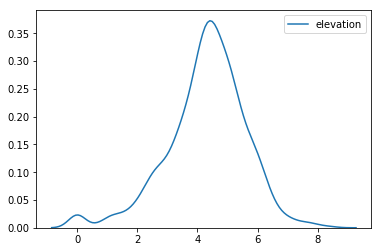

In [12]:
# Testing numerical data
elev=data['elevation']
#Natural log of elevation
log_elev=np.log(elev)
data['log_elevation']=log_elev
sns.kdeplot(log_elev)
# data.head(5)

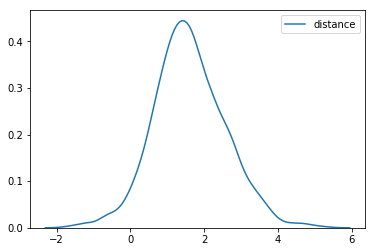

In [13]:
dist=data['distance']
log_dist=np.log(dist)
log_dist
data['log_distance']=log_dist
sns.kdeplot(log_dist)
# data.head(2)

###  cosine similarity metric for numerical data

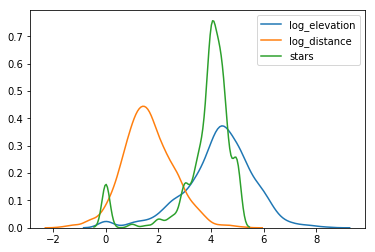

In [14]:
num_data=data[['log_elevation','log_distance','stars']]
sns.kdeplot(data['log_elevation'])
sns.kdeplot(data['log_distance'])
sns.kdeplot(data['stars'])
# num_data['log_elevation']

C:\Users\chtra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


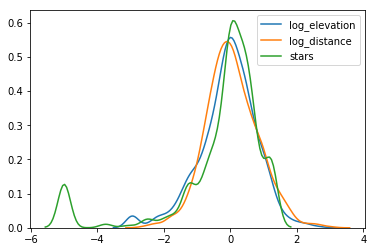

In [15]:
# Robust scaling for numerical data
scaler=RobustScaler()
# scaler=StandardScaler()
scaled_numdata=scaler.fit_transform(num_data)
scaled_numdata=pd.DataFrame(scaled_numdata, columns=['log_elevation', 'log_distance', 'stars'])
sns.kdeplot(scaled_numdata['log_elevation'])
sns.kdeplot(scaled_numdata['log_distance'])
sns.kdeplot(scaled_numdata['stars'])

In [16]:
# Cosine similarity for numerical data
scaled_numdata.shape
cosine_sim_num = linear_kernel(scaled_numdata, scaled_numdata)
cosine_sim_num1 = cosine_similarity(scaled_numdata, scaled_numdata)
cosine_sim_num[0], cosine_sim_num[1]

(array([ 0.55788665, -0.03610592, -0.49512622, ...,  0.45589055,
         2.11114822,  0.15141181]),
 array([-0.03610592,  0.16815323,  0.3060822 , ..., -0.27964914,
        -1.19278599,  0.06182081]))

###  cosine similarity of numerical data - only elevation and distance

C:\Users\chtra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


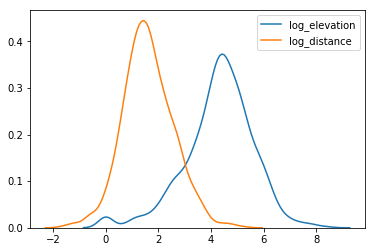

In [17]:
num_data2=data[['log_elevation','log_distance']]
sns.kdeplot(data['log_elevation'])
sns.kdeplot(data['log_distance'])
# num_data['log_elevation']

C:\Users\chtra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


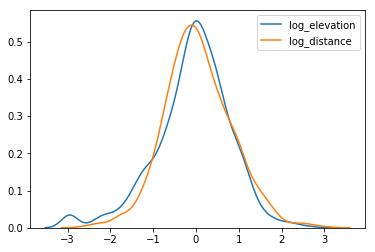

In [18]:
# Robust scaling for numerical data
scaler=RobustScaler()
# scaler=StandardScaler()
scaled_numdata2=scaler.fit_transform(num_data2)
scaled_numdata2=pd.DataFrame(scaled_numdata2, columns=['log_elevation', 'log_distance'])
sns.kdeplot(scaled_numdata2['log_elevation'])
sns.kdeplot(scaled_numdata2['log_distance'])

In [19]:
# Cosine similarity for numerical data
scaled_numdata2.shape
cosine_sim_num2 = linear_kernel(scaled_numdata2, scaled_numdata2)
cosine_sim_num2c = cosine_similarity(scaled_numdata2, scaled_numdata2)
cosine_sim_num2[0], cosine_sim_num2c[1]
cosine_sim_num2c.shape
cosine_sim_num2c

array([[ 1.        ,  0.97521905, -0.43241187, ...,  0.40333187,
         0.73553754,  0.33880283],
       [ 0.97521905,  1.        , -0.22220807, ...,  0.59578481,
         0.8671978 ,  0.5385637 ],
       [-0.43241187, -0.22220807,  1.        , ...,  0.65067672,
         0.29281602,  0.70184636],
       ...,
       [ 0.40333187,  0.59578481,  0.65067672, ...,  1.        ,
         0.91659999,  0.99758509],
       [ 0.73553754,  0.8671978 ,  0.29281602, ...,  0.91659999,
         1.        ,  0.88661801],
       [ 0.33880283,  0.5385637 ,  0.70184636, ...,  0.99758509,
         0.88661801,  1.        ]])

###  Create cosine similarity based on all features

In [20]:
#Combined features where only distance and elevation are used for the numerical data
combined_features_sim2=np.concatenate([cosine_sim_tagstr, cosine_sim_diffic, cosine_sim_num2], axis=1)
combined_features_sim2.shape

#Calculate similarity matrix for combined features
cosine_sim_allfeat2=cosine_similarity(combined_features_sim2, combined_features_sim2)
cosine_sim_allfeat2[0][:10]
# cosine_sim_allfeat2.shape

array([ 1.        ,  0.89425601,  0.8037629 ,  0.38365813, -0.13906687,
        0.114582  ,  0.8884473 ,  0.13253397,  0.0605837 , -0.29819394])

In [21]:
#Combined features where stars, distance and elevation are used for the numerical data
combined_features_sim3=np.concatenate([cosine_sim_tagstr, cosine_sim_diffic, cosine_sim_num], axis=1)
combined_features_sim3.shape

#Calculate similarity matrix for combined features
cosine_sim_allfeat3=cosine_similarity(combined_features_sim3, combined_features_sim3)
type(cosine_sim_allfeat3)

numpy.ndarray

###  Write cosine similarity based on all features into a pickle file

In [22]:
# mat=np.matrix(cosine_sim_allfeat2)
# mat.dump('cosine_sim2.dat')

np.savetxt('cosine_sim2.dat', cosine_sim_allfeat2)

In [23]:
x=np.loadtxt('../data/cosine_sim2.dat')
type(x)
# x

numpy.ndarray

In [24]:
mat3=np.matrix(cosine_sim_allfeat3)
mat3.dump('cosine_sim3.dat')


In [25]:
data.head()

,difficulty,distance,elevation,name,nreviews,review,route_type,stars,trail_attributes,trailName,tagstr,urlname,tags_str,log_elevation,log_distance
0,MODERATE,5.6,32.0,Taylor Creek Trail,23,"Great for strollers, bikes etc. Opposite side ...",Out & Back,3.7,"[dogs on leash, wheelchair friendly, kid frien...",taylor creek trail,dogsonleash wheelchairfriendly kidfriendly str...,taylor-creek-trail,"dogs on leash, wheelchair friendly, kid friend...",3.465736,1.722767
1,MODERATE,4.7,64.0,Hilton Falls Trail,238,What a gem! I was so pleasantly surprised by ...,Loop,4.3,"[dogs on leash, cross country skiing, fishing,...",hilton falls trail,dogsonleash crosscountryskiing fishing hiking ...,hilton-falls-trail,"dogs on leash, cross country skiing, fishing, ...",4.158883,1.547563
2,MODERATE,2.3,100.0,Niagara Glen Trail,135,Beautiful area with several trails. Loved exp...,Loop,4.7,"[dogs on leash, kid friendly, hiking, nature t...",niagara glen trail,dogsonleash kidfriendly hiking naturetrips wal...,niagara-glen-trail,"dogs on leash, kid friendly, hiking, nature tr...",4.605170,0.832909
3,MODERATE,7.2,128.0,Nassagaweya and Bruce Trail Loop from Rattlesn...,170,Great views! We went in January so there weren...,Loop,4.2,"[dogs on leash, kid friendly, hiking, nature t...",nassagaweya and bruce trail loop from rattlesn...,dogsonleash kidfriendly hiking naturetrips sno...,nassagaweya-and-bruce-trail-loop-from-rattlesn...,"dogs on leash, kid friendly, hiking, nature tr...",4.852030,1.974081
4,MODERATE,15.3,427.0,Lion's Head Loop Via Bruce Trail,117,Amazing trail with stunning lookouts. Hiked it...,Loop,4.8,"[dogs on leash, hiking, nature trips, walking,...",lion's head loop via bruce trail,dogsonleash hiking naturetrips walking birdwat...,lion's-head-loop-via-bruce-trail-,"dogs on leash, hiking, nature trips, walking, ...",6.056784,2.727853


In [26]:
cosine_sim=np.loadtxt('../data/cosine_sim2.dat')


def recommendations_trailname(trail_name, cosine_sim=cosine_sim):
    indices=pd.Series(data.index, index=data['name'].str.lower())
    index=indices[trail_name]
    print ('index', index)
    #Extract pairwise similarity score with all trails for the input trail
    similarity_scores=list(enumerate(cosine_sim[index]))
#     print (similarity_scores)
    #Sort scores to extract the top ranked trails
    sorted_scores=sorted(similarity_scores, key=lambda x:x[1], reverse=True)
    sorted_scores=sorted_scores[1:11]
    print (sorted_scores)

np.squeeze(np.array(cosine_sim))
recommendations_trailname('hilton falls trail')

index 1
[(442, 0.9829678736877491), (325, 0.9825410201954988), (130, 0.9728747080398896), (269, 0.968575693936848), (716, 0.965348896476093), (540, 0.9652673700929668), (1114, 0.9613720373617043), (896, 0.9612984335043019), (877, 0.9601624237303154), (154, 0.9597624255427394)]


In [27]:
# data['trailName']=data['name'].str.lower()
# data

###  Testing tag comparison with user input

In [28]:
s1='dogsonleash'
s2='kidfriendly'
inpstr=str(s1) + str(s2)
print (inpstr)
tags=data['tagstr']
tags_nospace=tags.replace(' ', '')
# tags_nospace.head()

unique_tags=pd.Series([tag for tags in data.trail_attributes for tag in tags]).unique()
utags_nospace=sorted([tag.replace(' ', '') for tag in unique_tags])

# unique_tags
# utags_nospace

dogsonleashkidfriendly


In [29]:
cv=CountVectorizer(vocabulary='utags_nospace')
# lbstr=pd.Series(cv.fit_transform(data['tagstr']),
#                      data.index,
#                      cv.get_feature_names(),
#                      default_fill_value=0)

# utags_nospace
# data['tagstr'][0]

###  Testing review text vectorization

In [30]:
rev=data['review']
# rev.head(2)
rev1=rev[rev != '']
# rev1[899]

In [31]:
#Create dataframe with trail that have reviews (remove all trails with no reviews)
data_rev=data[data['review'] != '']
data.shape
# sorted(data_rev.columns)
cols=['name', 'route_type', 'difficulty', 'distance', 'elevation', 'log_distance', 'log_elevation', 'nreviews', 'review',\
      'stars', 'tags_str', 'tagstr', 'trailName', 'trail_attributes', 'urlname']
# cols

In [32]:
#Preprocess reviews text
reviews=data_rev.review
reviews=reviews.str.lower()
# reviews=reviews.str.replace('\"', '')
reviews=reviews.str.replace("\'", '')
reviews=reviews.str.replace('\"', '')
reviews=reviews.str.replace('\!', ' ')
reviews=reviews.str.replace('\/', ' ')
reviews=reviews.str.replace(',', ' ')
reviews=reviews.str.replace('(', ' ')
reviews=reviews.str.replace(')', ' ')
reviews=reviews.str.replace('.', ' ')
reviews=reviews.str.replace('\d+', '')

In [35]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.tokenize import RegexpTokenizer, sent_tokenize, word_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
def preprocess(text):
    words=[word for sentence in sent_tokenize(text) for word in word_tokenize(sentence)]
    words=[word for word in words if len(word)>3]
    words=[word for word in words if word not in gensim.parsing.preprocessing.STOPWORDS]
    #Lemmatize
    words=[WordNetLemmatizer().lemmatize(word) for word in words]
#     words=[PorterStemmer.stem(word) for word in words]
    return words

review_list=pd.Series.tolist(reviews)
# print(review_list[0])

preproc=list(preprocess(text) for text in review_list)

In [36]:
rtfidf=TfidfVectorizer(stop_words='english')
rtfidf_mat=rtfidf.fit_transform(review_list)
# reviews.head()
# print (rtfidf.get_feature_names())